## Module 03: Spatial Data in Python

### Objectives:

1. Read the rasterio documentation: https://rasterio.readthedocs.io/en/latest/quickstart.html
2. Review this notebook. Also a helpful link: https://matplotlib.org/stable/tutorials/colors/colormaps.html
3. Add comments in Markdown cells to explain what the notebook is doing

In [1]:
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

resource_id = '6088bb8112af4f289af290e0c9e435ac'


In [2]:
raster1_fn = '../../downloads/'+resource_id+'/'+resource_id+'/data/contents/VIIRS StandingWater data/MOSAIC_WATER_VIIRS_Prj_SVI_j01_d20180917_t1829_t1832_cspp_dev_129_3262_3262_011.tif'
raster2_fn = '../../downloads/'+resource_id+'/'+resource_id+'/data/contents/VIIRS StandingWater data/MOSAIC_WATER_VIIRS_Prj_SVI_j01_d20180920_t1732_t1735_cspp_dev_129_3262_3262_011.tif'

raster1 = rio.open(raster1_fn)
raster2 = rio.open(raster2_fn)


In [3]:
raster1.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 3262,
 'height': 3262,
 'count': 1,
 'crs': CRS.from_epsg(6318),
 'transform': Affine(0.003372000000000001, 0.0, -83.99999550711311,
        0.0, -0.0033719999999999987, 40.999395039128046)}

In [4]:
raster1.crs

CRS.from_epsg(6318)

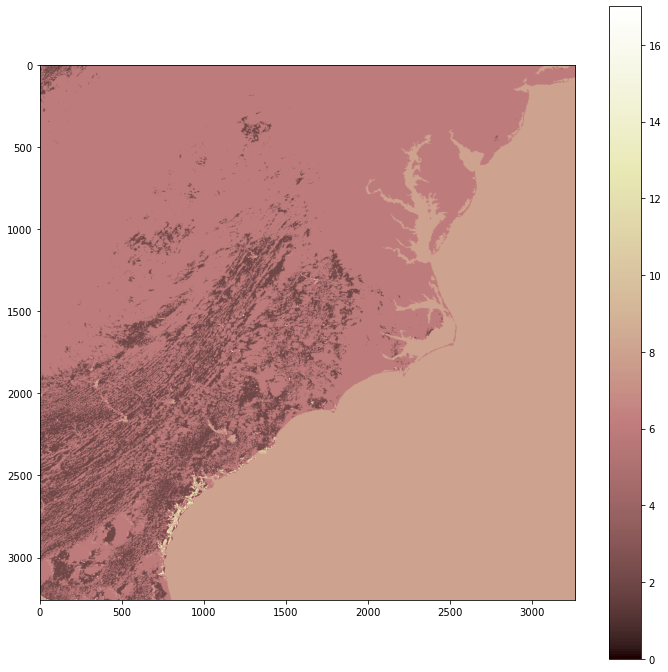

In [5]:
plt.figure(figsize=(12,12))
plt.imshow(raster1.read(1), cmap='pink')
plt.colorbar()
plt.show()

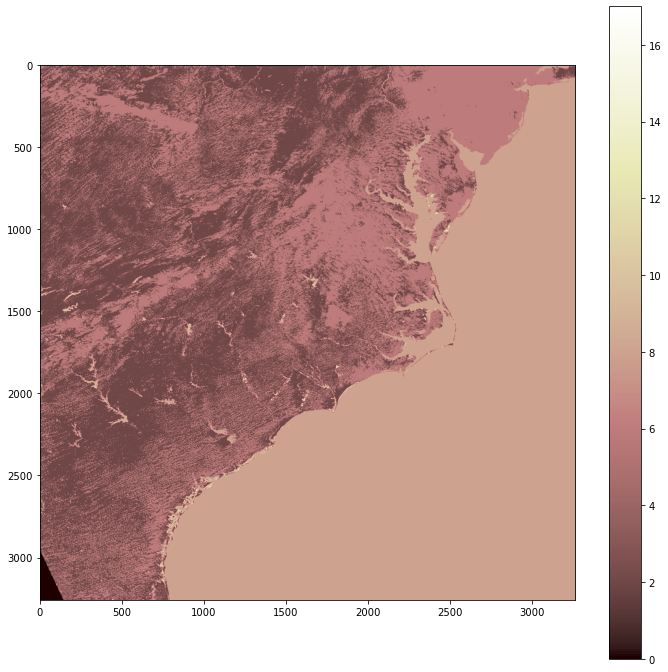

In [6]:
plt.figure(figsize=(12,12))
plt.imshow(raster2.read(1), cmap='pink')
plt.colorbar()
plt.show()

In [7]:
diff = raster2.read(1) - raster1.read(1) 
diff.dtype

dtype('uint8')

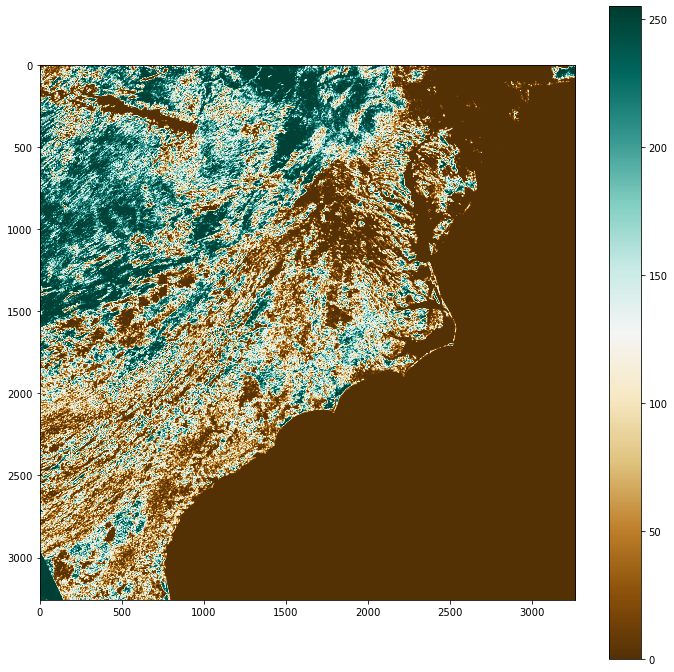

In [8]:
plt.figure(figsize=(12,12))
plt.imshow(diff, cmap='BrBG')
plt.colorbar()
plt.show()

In [9]:
SVI_day1 = raster1.read(1)
print(SVI_day1)

[[0 6 6 ... 8 8 8]
 [6 6 6 ... 8 8 8]
 [6 6 6 ... 8 8 8]
 ...
 [8 8 8 ... 8 8 8]
 [8 8 8 ... 8 8 8]
 [8 8 8 ... 8 8 8]]


In [10]:
SVI_day1 = SVI_day1.astype(np.float32)
print(SVI_day1)

[[0. 6. 6. ... 8. 8. 8.]
 [6. 6. 6. ... 8. 8. 8.]
 [6. 6. 6. ... 8. 8. 8.]
 ...
 [8. 8. 8. ... 8. 8. 8.]
 [8. 8. 8. ... 8. 8. 8.]
 [8. 8. 8. ... 8. 8. 8.]]


In [11]:
SVI_day1_masked = np.where(SVI_day1==0, np.nan, SVI_day1)
print(SVI_day1_masked)

[[nan  6.  6. ...  8.  8.  8.]
 [ 6.  6.  6. ...  8.  8.  8.]
 [ 6.  6.  6. ...  8.  8.  8.]
 ...
 [ 8.  8.  8. ...  8.  8.  8.]
 [ 8.  8.  8. ...  8.  8.  8.]
 [ 8.  8.  8. ...  8.  8.  8.]]


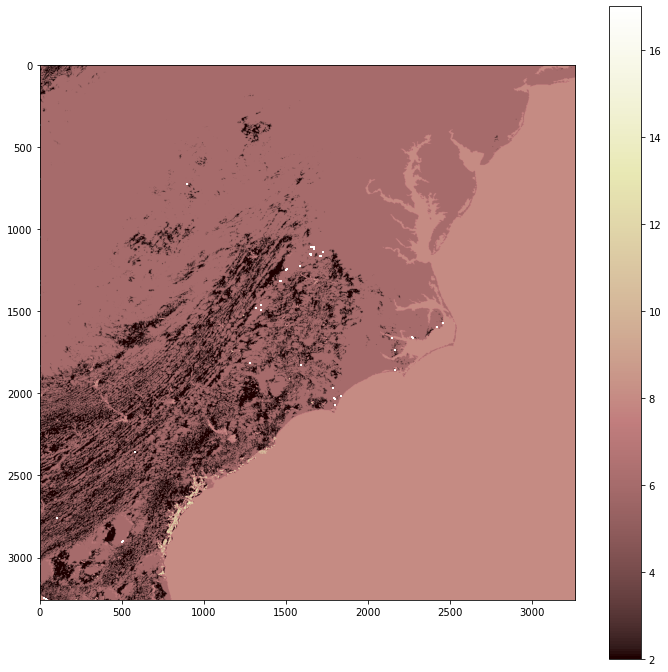

In [12]:
plt.figure(figsize=(12,12))
plt.imshow(SVI_day1_masked, cmap='pink')
plt.colorbar()
plt.show()

In [13]:
SVI_day2 = raster2.read(1)
SVI_day2 = SVI_day2.astype(np.float32)
SVI_day2_masked = np.where(SVI_day2==0, np.nan, SVI_day2)

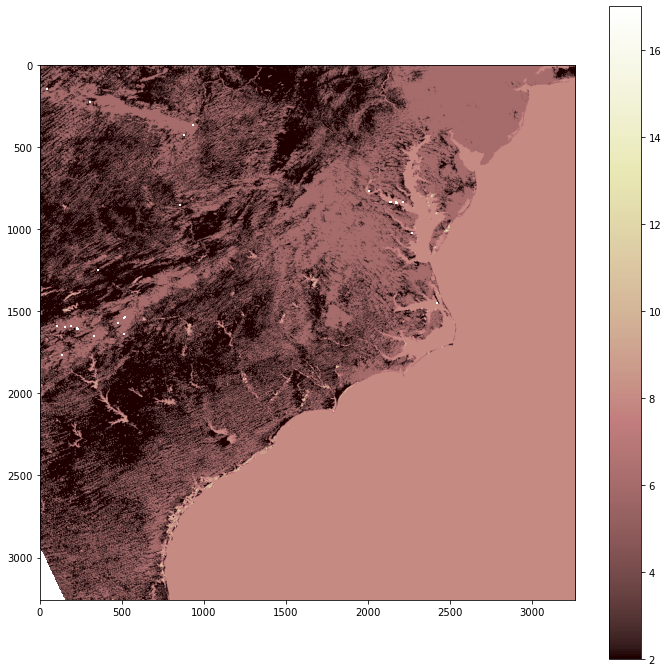

In [14]:
plt.figure(figsize=(12,12))
plt.imshow(SVI_day2_masked, cmap='pink')
plt.colorbar()
plt.show()


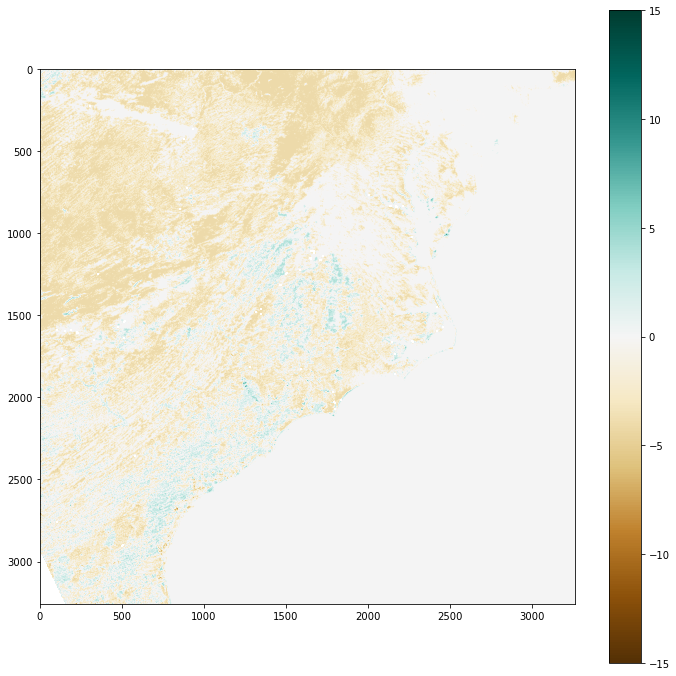

In [15]:
plt.figure(figsize=(12,12))
plt.imshow(SVI_day2_masked-SVI_day1_masked, cmap='BrBG')
plt.colorbar()
plt.show()